Data Analysis Of College Student Expenditure



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("/content/student_spending (1).csv")

In [3]:
df.head()

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


In [4]:
x=str(df['age'].max())
y=str(df['age'].min())
print("Student age range is between "+ y +" and "+ x )

Student age range is between 18 and 25


In [5]:
df.shape

(1000, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                1000 non-null   int64 
 1   age                       1000 non-null   int64 
 2   gender                    1000 non-null   object
 3   year_in_school            1000 non-null   object
 4   major                     1000 non-null   object
 5   monthly_income            1000 non-null   int64 
 6   financial_aid             1000 non-null   int64 
 7   tuition                   1000 non-null   int64 
 8   housing                   1000 non-null   int64 
 9   food                      1000 non-null   int64 
 10  transportation            1000 non-null   int64 
 11  books_supplies            1000 non-null   int64 
 12  entertainment             1000 non-null   int64 
 13  personal_care             1000 non-null   int64 
 14  technology               

In [7]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [8]:
df.describe()

,age,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.675000,1020.650000,504.771000,4520.395000,696.00600,252.642000,124.63700,174.761000,84.814000,60.699000,178.304000,114.310000,108.910000
std,2.322664,293.841161,287.092575,860.657944,171.21862,86.949606,43.55799,72.404518,37.970451,22.898007,71.744441,49.591544,52.412221
min,18.000000,501.000000,0.000000,3003.000000,401.00000,100.000000,50.00000,50.000000,20.000000,20.000000,50.000000,30.000000,20.000000
25%,20.000000,770.750000,261.000000,3779.750000,538.75000,175.000000,88.00000,112.000000,54.000000,41.000000,114.000000,73.000000,63.750000
50%,22.000000,1021.000000,513.000000,4547.500000,704.50000,255.000000,123.00000,175.000000,86.000000,62.000000,178.000000,115.000000,110.000000
75%,24.000000,1288.250000,751.500000,5285.000000,837.25000,330.000000,162.25000,238.000000,116.000000,80.000000,241.000000,158.000000,153.000000
max,25.000000,1500.000000,1000.000000,6000.000000,1000.00000,400.000000,200.00000,300.000000,150.000000,100.000000,300.000000,200.000000,200.000000


In [9]:
print(df.isna().sum())

age                         0
gender                      0
year_in_school              0
major                       0
monthly_income              0
financial_aid               0
tuition                     0
housing                     0
food                        0
transportation              0
books_supplies              0
entertainment               0
personal_care               0
technology                  0
health_wellness             0
miscellaneous               0
preferred_payment_method    0
dtype: int64


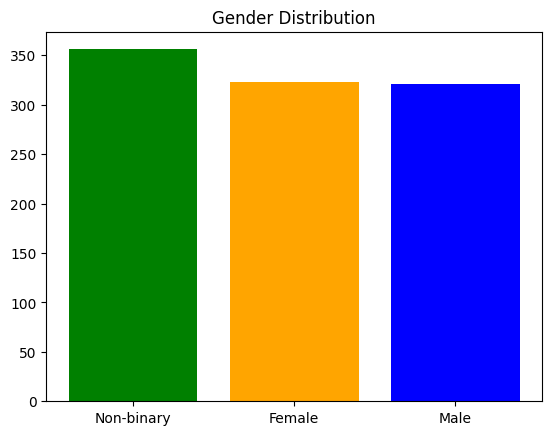

In [10]:
count = df['gender'].value_counts()
genders = df.gender.unique()
plt.bar( genders, count ,color=['green','orange','blue'])
plt.title("Gender Distribution")
plt.show()

In [32]:

count = df['preferred_payment_method'].value_counts()
methods = df.preferred_payment_method.unique()

fig = px.pie(
    values=count,
    names=methods,
    title="Ways of Payment",
    hole=0.6  # Adjusts the size of the hole in the pie chart

)
fig.update_layout(width=400, height=360)
fig.show()

In [35]:
fig = px.sunburst(df, path=['gender', 'year_in_school'])
fig.update_traces(textinfo="label + percent parent")
fig.update_layout(title_text="Gender Distribution by year in college ", titlefont={'size': 24, 'family': 'Libre Baskerville'}, width=500, height=500)
fig.show()

In [36]:
fig1 = px.sunburst(df,path=["gender","major"])
fig1.update_traces(textinfo="label + percent parent")
fig1.update_layout(title_text="Gender Distribution by Major in college ", titlefont={'size': 24, 'family': 'Libre Baskerville'}, width=500, height=500)
fig1.show()

In [37]:
fig2 = px.sunburst(df,path=["gender","preferred_payment_method"])
fig2.update_traces(textinfo="label + percent parent")
fig2.update_layout(title_text="Payment Method Distribution ", titlefont={'size': 30, 'family': 'Libre Baskerville'}, width=500, height=500,title_x=0.5)
fig2.show()

In [15]:
fig3 = px.sunburst(df, path=["year_in_school", "major"])
fig3.update_traces(textinfo="label+percent parent")
fig3.update_layout(title_text="Major Distribution by Years", titlefont={'size': 30, 'family': 'Libre Baskerville'}, width=500, height=500, title_x=0.5)
fig3.show()

In [38]:
fig3 = px.sunburst(df,path=["year_in_school","preferred_payment_method"])
fig3.update_traces(textinfo="label + percent parent")
fig3.update_layout(title_text="Payment Method by Years in College", titlefont={'size': 30, 'family': 'Libre Baskerville'}, width=500, height=500,title_x=0.5)
fig3.show()

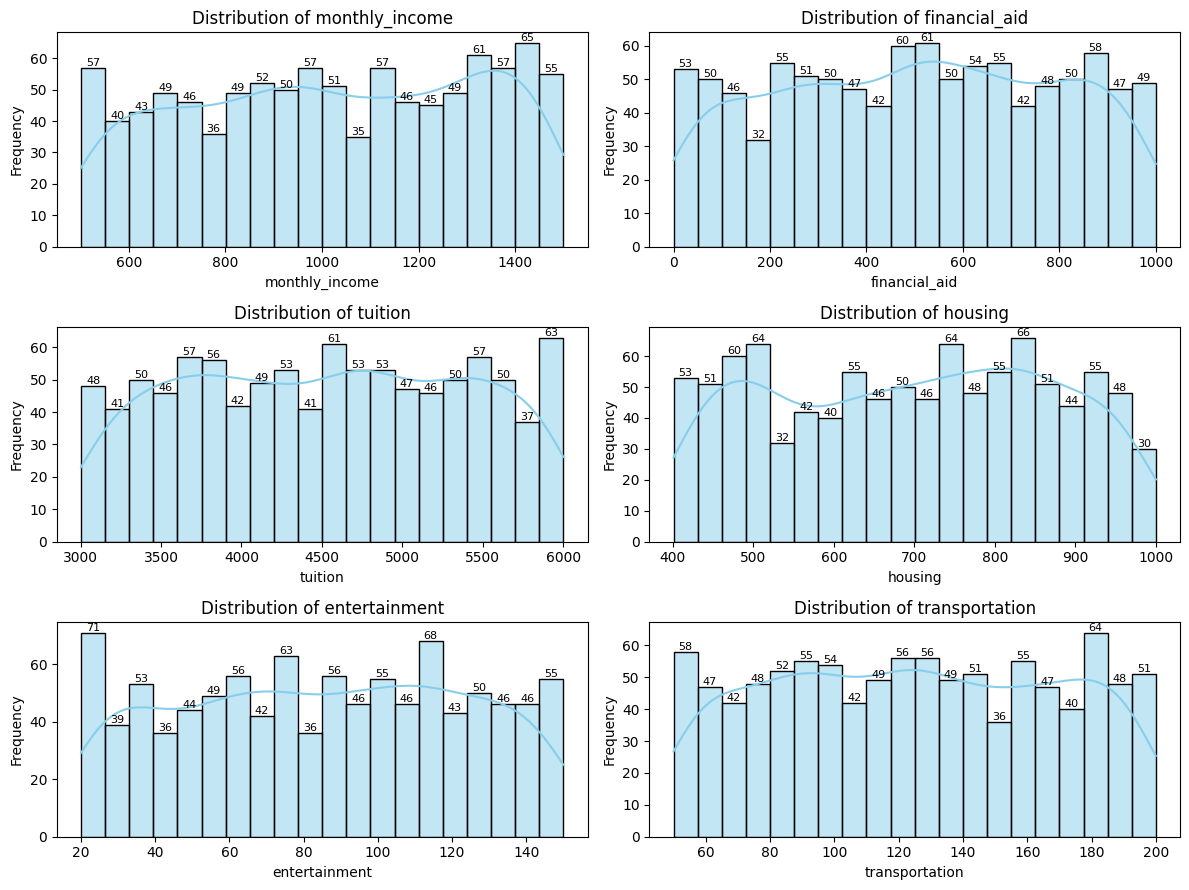

In [17]:
# Select additional columns for histograms
selected_columns = ['monthly_income', 'financial_aid', 'tuition', 'housing', 'entertainment', 'transportation']

# Determine the number of rows and columns for subplots
num_rows = len(selected_columns) // 2 + len(selected_columns) % 2
num_cols = 2

# Set up subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each selected column
for i, column in enumerate(selected_columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i], color='skyblue')

    # Add numbers on top of each bar
    for rect in axes[i].patches:
        height = rect.get_height()
        axes[i].text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=8)

    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [18]:
df['monthly_income'] = df['monthly_income'].astype(int)
df['financial_aid'] = df['financial_aid'].astype(int)
df['tuition'] = df['tuition'].astype(int)
df['housing'] = df['housing'].astype(int)
df['entertainment'] = df['entertainment'].astype(int)
df['transportation'] = df['transportation'].astype(int)

In [19]:
df["total_spend"] = df.iloc[:, 6:16].sum(axis=1)
print(df['total_spend'])

0      7707
1      6756
2      4810
3      6665
4      5828
       ... 
995    5714
996    5042
997    5294
998    5327
999    7946
Name: total_spend, Length: 1000, dtype: int64


In [20]:
result= df.groupby('gender')['total_spend'].mean()
df_result = pd.DataFrame(result)

In [21]:
df_result

,total_spend
gender,
Female,6278.594427
Male,6340.912921
Non-binary,6324.383178


In [22]:
agewise_spend= df.groupby('age')['total_spend'].mean()
df_age=pd.DataFrame(agewise_spend)
df_age

,total_spend
age,
18,6276.774194
19,6342.824074
20,6202.639640
21,6305.584746
22,6272.169231
23,6342.820312
24,6315.382353
25,6437.420690


In [23]:
spendby_male = df[df["gender"] == "Male"].iloc[:,6:16].mean()
spendby_female = df[df["gender"] == "Female"].iloc[:,6:16].mean()
spendby_non_binary = df[df["gender"] == "Non-binary"].iloc[:,6:16].mean()

In [24]:
df_male = pd.DataFrame(spendby_male)
df_female = pd.DataFrame(spendby_female)
df_non_binary = pd.DataFrame(spendby_non_binary)

In [25]:
df_mean = pd.merge(df_male,df_female,left_index = True, right_index= True)
df_mean = pd.merge(df_mean,df_non_binary,left_index = True, right_index= True)
df_mean

,0_x,0_y,0
tuition,4541.362360,4494.210526,4523.489097
housing,707.755618,689.504644,689.517134
food,254.876404,247.681115,255.155763
transportation,124.471910,126.040248,123.408100
books_supplies,171.165730,178.987616,174.495327
entertainment,82.092697,85.433437,87.208723
personal_care,60.207865,60.993808,60.947040
technology,179.112360,172.266254,183.482866
health_wellness,112.837079,114.804954,115.445483
miscellaneous,107.030899,108.671827,111.233645


In [26]:
df_mean.rename(columns={"0_x": "male", "0_y": "female"}, inplace=True)
df_mean.rename(columns={ "0": "non_binary"},inplace=True)

In [27]:
df_mean

,male,female,0
tuition,4541.362360,4494.210526,4523.489097
housing,707.755618,689.504644,689.517134
food,254.876404,247.681115,255.155763
transportation,124.471910,126.040248,123.408100
books_supplies,171.165730,178.987616,174.495327
entertainment,82.092697,85.433437,87.208723
personal_care,60.207865,60.993808,60.947040
technology,179.112360,172.266254,183.482866
health_wellness,112.837079,114.804954,115.445483
miscellaneous,107.030899,108.671827,111.233645
